# Практична робота №5

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

**Завдання на практичну роботу "Основи TensorFlow та Deep Learning":**

1. **Побудова моделі для регресії:**
   - використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
   - Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.
   - Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.
   - Оцініть результати навчання та відобразіть їх графічно.
   - Порівняйте з результатами, отриманими у лабораторній роботі 2.

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 64)                384       
                                                                 
 dense_94 (Dense)            (None, 32)                2080      
                                                                 
 dense_95 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 4141.0718 - mse: 4141.0718 - val_loss: 4436.4839 - val_mse: 4436.4839
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 4052.3149 - mse: 4052.3149 - val_loss: 4314.3711 - val_mse: 4314.371

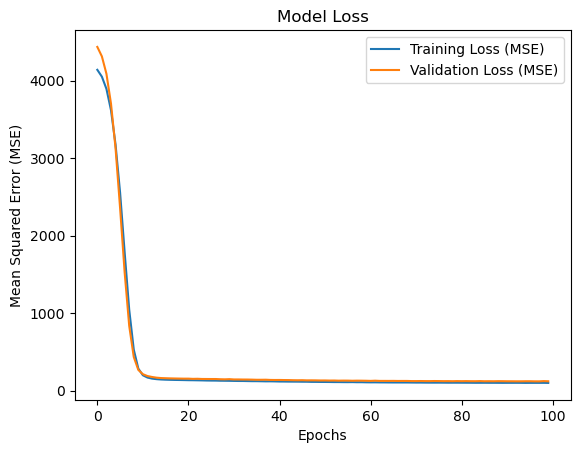

7/7 [==============================] - 0s 3ms/step


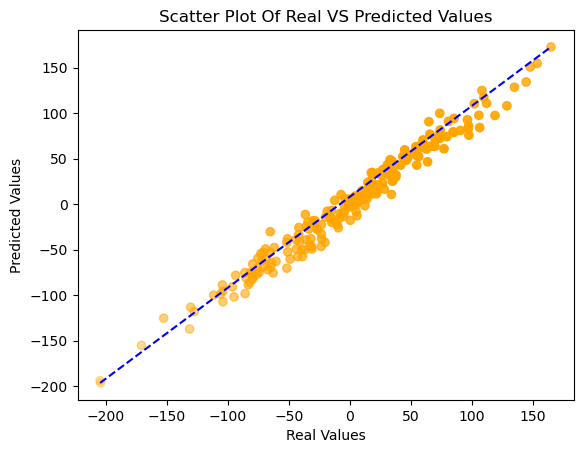

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('dataset1.csv')

X = data.drop("Target", axis=1)
y = data["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MSE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MSE) on Test Data:", test_loss)

# MAE loss function plot on train and validation data
plt.plot(figure=(12, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Scatter Plot Of Real VS Predicted Values
y_pred = model.predict(X_test)
distances = np.abs(y_test - y_pred) # Distance between real and predicted values
max_distance = np.max(distances) # For setting transparency
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Transparency which depends on the distance
    plt.scatter(y_test[i], y_pred[i], c='orange', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color = 'blue')
plt.title("Scatter Plot Of Real VS Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

2. **Побудова моделі для класифікації:**
   - використайте згенерований у лабораторній роботі 3  набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
   - Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
   - Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
   - Оцініть результати навчання та відобразіть їх графічно.
   - Порівняйте з результатами, отриманими у лабораторній роботі 3.

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 64)                192       
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dense_98 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 18ms/step - loss: 0.5857 - accuracy: 0.7912 - val_loss: 0.4841 - val_accuracy: 0.9100
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4088 - accuracy: 0.9212 - val_loss: 0.3300 - val_accuracy: 0.9200
Epoc

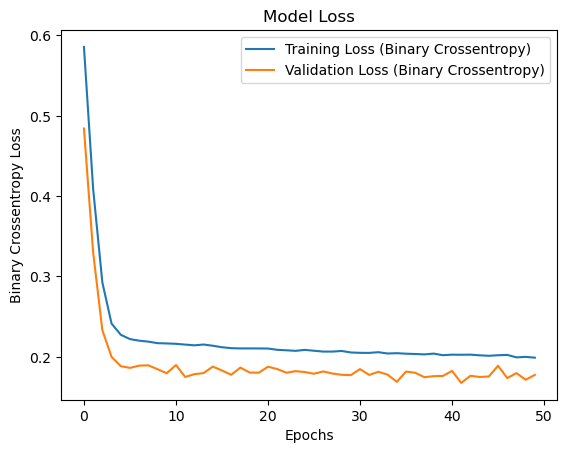

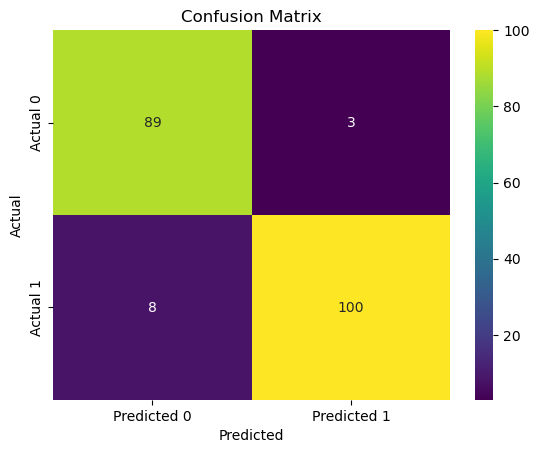

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('classification_1.csv')

X = data.drop("Target", axis=1)
y = data["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy}')

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Training Loss (Binary Crossentropy) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (Binary Crossentropy) on Test Data:", test_loss)

# MAE loss function plot on train and validation data
plt.plot(history.history['loss'], label='Training Loss (Binary Crossentropy)')
plt.plot(history.history['val_loss'], label='Validation Loss (Binary Crossentropy)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()